In [2]:
#import wget
import os
import glob
import random
import numpy as np
import os,shutil
import matplotlib 
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread

In [3]:
mydir = r'C:\\Users\\炸酱面\\Downloads\\project\\warwick_qu_dataset_released_2016_07_08\\Warwick QU Dataset (Released 2016_07_08)'

In [4]:
#get dataset
newdir = os.getcwd()
raw_img_train_location = newdir+os.sep+'train'+os.sep+'raw'
raw_img_testA_location = newdir+os.sep+'testA'+os.sep+'raw'
raw_img_testB_location = newdir+os.sep+'testB'+os.sep+'raw'
anno_img_train_location = newdir+os.sep+'train'+os.sep+'anno'
anno_img_testA_location = newdir+os.sep+'testA'+os.sep+'anno'
anno_img_testB_location = newdir+os.sep+'testB'+os.sep+'anno'

if not os.path.isdir(raw_img_train_location):
    os.makedirs(raw_img_train_location)
if not os.path.isdir(raw_img_testA_location):
    os.makedirs(raw_img_testA_location)
if not os.path.isdir(raw_img_testB_location):
    os.makedirs(raw_img_testB_location)

if not os.path.isdir(anno_img_train_location):
    os.makedirs(anno_img_train_location)
if not os.path.isdir(anno_img_testA_location):
    os.makedirs(anno_img_testA_location)
if not os.path.isdir(anno_img_testB_location):
    os.makedirs(anno_img_testB_location)


testsetA = []
testsetB = []
trainset = []
testmaskA = []
testmaskB = []
trainmask = []

testsetA2 = []
testsetB2 = []
trainset2 = []
testmaskA2 = []
testmaskB2 = []
trainmask2 = []


pathDir =  os.listdir(mydir)    


for allDir in pathDir:      
    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==True:     
        maskA=imread(mydir+"\\"+ allDir)
        testmaskA.append(maskA)
        testmaskA2.append(allDir)
        


    if allDir.startswith('testA')==True and allDir.endswith('anno.bmp')==False:
        testA=imread(mydir+"\\"+allDir)
        testsetA.append(testA)
        testsetA2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==True:
        maskB=imread(mydir+"\\"+allDir)
        
        testmaskB.append(maskB)
        testmaskB2.append(allDir)

    if allDir.startswith('testB')==True and allDir.endswith('anno.bmp')==False:
        testB=imread(mydir+"\\"+allDir)
        
        testsetB.append(testB)
        testsetB2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==True:
        mask=imread(mydir+"\\"+allDir)
        
        trainmask.append(mask)
        trainmask2.append(allDir)

    if allDir.startswith('train')==True and allDir.endswith('anno.bmp')==False:
        train=imread(mydir+"\\"+allDir)
 
        trainset.append(train)
        trainset2.append(allDir)


    
def copy_img(path,list):
    for i in range(len(list)):
        new_obj_name = list[i]
        shutil.copy(mydir+'\\'+new_obj_name,path+'\\'+new_obj_name)
 
 

copy_img(raw_img_train_location,trainset2)
copy_img(raw_img_testA_location,testsetA2) 
copy_img(raw_img_testB_location,testsetB2)
copy_img(anno_img_train_location,trainmask2)
copy_img(anno_img_testA_location,testmaskA2)
copy_img(anno_img_testB_location,testmaskB2)



In [69]:
batch_size=64

def batch_generator(img_list, anno_list, batch_size, num_of_classes=2):
    images=[]
    annos=[]
    #Get random image
    for i in range(batch_size):
        rand_int = random.randint(0, len(img_list)-1)
        img = np.array(Image.open(img_list[rand_int]))
        images.append(img)
        anno = np.array(Image.open(anno_list[rand_int]).convert("L"))
        anno[anno>0] = 1
        anno_reshaped = np.zeros((anno.shape[0], anno.shape[1], num_of_classes))
        


    #IMAGE AUGMENTATION SHOULD HAPPEN HERE.

    #EXAMPLES : RANDOM CROPPING, RANDOM FLIPPING

    #MIRRORING, ZOOMING, MEAN SUBTRACTION AND STD DIVISION.



        for i in range(num_of_classes):

            anno_reshaped[:, :, i][anno == i] = 1
        
        annos.append(anno_reshaped)
        
    images=np.array(images)
    annos=np.array(annos)

    return images, annos
    
    


#Gland images are bmp, my corrosponding annotations are converted pngs.



path_to_images = 'C:\\Users\\炸酱面\\Downloads\\project\\train\\raw'

path_to_annotations = 'C:\\Users\\炸酱面\\Downloads\\project\\train\\anno'

img_list = glob.glob(path_to_images+os.sep+"*.bmp")

img_list = sorted(img_list)

anno_list = glob.glob(path_to_annotations+os.sep+"*.bmp")

anno_list = sorted(anno_list)




img, anno = batch_generator(img_list, anno_list,batch_size, 2)

#Please note, if done correctly, you should not be able to view your raw image directly

#with matplotlib due to the subtraction of the mean, and pil not understanding floats.
print(img.shape)
print(anno.shape)


(64,)
(64,)


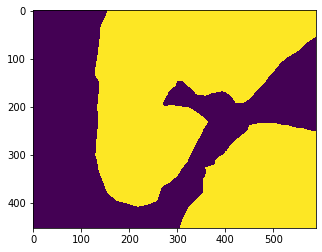

In [72]:
plt.imshow(anno[1][:, :, 0])

plt.imshow(anno[1][:, :, 1])